## Chapter 7
# 데이터 준비하기: 다듬기, 변형, 병합
---
## 미국 농무부 음식 데이터베이스

In [78]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [79]:
import json

f = open('foods-2011-10-03.json')
data = json.load(f)
f.close()

In [80]:
type(data), len(data)
data[0].keys() # ['group', 'manufacturer', 'description', 'nutrients', 'portions', 'id', 'tags']

df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 7 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
nutrients       6636 non-null object
portions        6636 non-null object
tags            6636 non-null object
dtypes: int64(1), object(6)
memory usage: 207.4+ KB


In [81]:
df[:5]

,description,group,id,manufacturer,nutrients,portions,tags
0,"Cheese, caraway",Dairy and Egg Products,1008,,"[{'units': 'g', 'value': 25.18, 'group': 'Comp...","[{'grams': 28.35, 'amount': 1, 'unit': 'oz'}]",[]
1,"Cheese, cheddar",Dairy and Egg Products,1009,,"[{'units': 'g', 'value': 24.9, 'group': 'Compo...","[{'grams': 132.0, 'amount': 1, 'unit': 'cup, d...",[]
2,"Cheese, edam",Dairy and Egg Products,1018,,"[{'units': 'g', 'value': 4.22, 'group': 'Other...","[{'grams': 28.35, 'amount': 1, 'unit': 'oz'}, ...",[]
3,"Cheese, feta",Dairy and Egg Products,1019,,"[{'units': 'g', 'value': 5.2, 'group': 'Other'...","[{'grams': 150.0, 'amount': 1, 'unit': 'cup, c...",[]
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,,"[{'units': 'g', 'value': 3.27, 'group': 'Other...","[{'grams': 28.35, 'amount': 1, 'unit': 'oz'}]",[]


In [82]:
info = pd.DataFrame(data, columns = ['description','group','id','manufacturer'])
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [83]:
info2 = info.take(info.id.argsort()).reset_index(drop=True)
info2['old_index']=info.id.argsort()
info2.head(10)

,description,group,id,manufacturer,old_index
0,"Cheese, caraway",Dairy and Egg Products,1008,,0
1,"Cheese, cheddar",Dairy and Egg Products,1009,,1
2,"Cheese, edam",Dairy and Egg Products,1018,,2
3,"Cheese, feta",Dairy and Egg Products,1019,,3
4,"Spices, allspice, ground",Spices and Herbs,1025,,73
5,"Spices, anise seed",Spices and Herbs,1026,,74
6,"Spices, basil, dried",Spices and Herbs,1027,,75
7,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,,4
8,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,,5
9,"Spices, cardamom",Spices and Herbs,1030,,76


In [84]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 129.6+ KB


In [85]:
(info.manufacturer.str.strip()=='').sum() # 4132
info.manufacturer.isnull().sum() # 1441

1441

In [86]:
pd.value_counts(info.group)

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

In [87]:
l = []

for d in data:
    n = pd.DataFrame(d['nutrients'])
    n['id'] = d['id']
    l.append(n)    

In [99]:
nutrients = pd.concat(l, ignore_index=True)
display(nutrients.shape, nutrients.head())

(389355, 5)

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [100]:
df = pd.DataFrame(np.arange(9).reshape(3,3))
pd.concat([df,df], ignore_index=True)

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,0,1,2
4,3,4,5
5,6,7,8


In [101]:
nutrients.duplicated().sum()

14179

In [102]:
nutrients = nutrients.drop_duplicates()
nutrients = nutrients.rename(columns={'description':'nutrient', 'group':'nutgroup'})

display(nutrients.shape, nutrients.head())

(375176, 5)

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [104]:
info = info.rename(columns={'description':'food','group':'fgroup'})
info.head()

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [105]:
ndata = pd.merge(nutrients,info,on='id',how='outer')
display(ndata.shape, ndata.head())

(375176, 8)

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


In [110]:
result = ndata.groupby(['nutrient','fgroup'])['value'].quantile(0.5)
result.head()

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
Name: value, dtype: float64

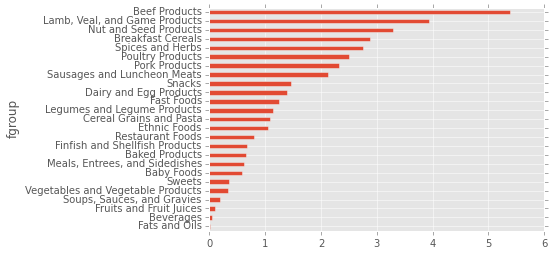

In [116]:
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [134]:
max_foods = ndata.groupby(['nutrient','nutgroup']).apply(lambda x: x.xs(x.value.idxmax()))[['value','food']]
max_foods.head()

,,value,food
nutrient,nutgroup,,
Adjusted Protein,Composition,12.900,"Baking chocolate, unsweetened, squares"
Alanine,Amino Acids,8.009,"Gelatins, dry powder, unsweetened"
"Alcohol, ethyl",Other,42.500,"Alcoholic beverage, distilled, all (gin, rum, ..."
Arginine,Amino Acids,7.436,"Seeds, sesame flour, low-fat"
Ash,Other,72.500,"Desserts, rennin, tablets, unsweetened"


In [158]:
max_foods.loc[(slice(None),'Amino Acids'),:] # max_foods.loc[pd.IndexSlice[:, 'Amino Acids'],:]

,,value,food
nutrient,nutgroup,,
Alanine,Amino Acids,8.009,"Gelatins, dry powder, unsweetened"
Arginine,Amino Acids,7.436,"Seeds, sesame flour, low-fat"
Aspartic acid,Amino Acids,10.203,Soy protein isolate
Cystine,Amino Acids,1.307,"Seeds, cottonseed flour, low fat (glandless)"
Glutamic acid,Amino Acids,17.452,Soy protein isolate
Glycine,Amino Acids,19.049,"Gelatins, dry powder, unsweetened"
Histidine,Amino Acids,2.999,"Whale, beluga, meat, dried (Alaska Native)"
Hydroxyproline,Amino Acids,0.803,"KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA..."
Isoleucine,Amino Acids,4.300,"Soy protein isolate, PROTEIN TECHNOLOGIES INTE..."
